# Diversity Analysis

In [1]:
import reservoir as rsv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

In [2]:
blocks = rsv.get_specific_drug_combo_blocks(study_name="ALMANAC")["block_id"]

combo_data = rsv.get_drug_combo_data_combos(block_ids=blocks)

In [3]:
# Keep MCF7 cell line only
combo_data = combo_data[combo_data["cell_line_name"] == "MCF7"]

In [4]:
# Only keep drugs that appear in at least 10 combinations
drug_val_counts = combo_data["drug_row_recover_id"].value_counts()
well_covered_drugs = drug_val_counts[drug_val_counts > 10].index

combo_data = combo_data[combo_data["drug_row_recover_id"].apply(lambda d: d in well_covered_drugs)]

In [5]:
(combo_data["synergy_bliss_max"] > 40).sum() / len(combo_data["synergy_bliss_max"])

0.014314928425357873

In [6]:
(combo_data["synergy_bliss_max"] > 40).sum()

63

In [7]:
combo_data[combo_data["synergy_bliss_max"] > 40]["drug_row_recover_id"].value_counts()

RE-MOL-0000435288    7
RE-MOL-0000311663    5
RE-MOL-0000584456    4
RE-MOL-0000408487    4
RE-MOL-0000005427    3
RE-MOL-0000575642    3
RE-MOL-0000968222    3
RE-MOL-0000075347    3
RE-MOL-0000021716    2
RE-MOL-0000585498    2
RE-MOL-0000123129    2
RE-MOL-0000575386    2
RE-MOL-0000372549    2
RE-MOL-0000028829    2
RE-MOL-0000293455    2
RE-MOL-0000601377    2
RE-MOL-0000535535    2
RE-MOL-0001086878    2
RE-MOL-0000009498    1
RE-MOL-0000075835    1
RE-MOL-0000376867    1
RE-MOL-0000006951    1
RE-MOL-0000208410    1
RE-MOL-0000575640    1
RE-MOL-0000016073    1
RE-MOL-0000402554    1
RE-MOL-0000192053    1
RE-MOL-0000042933    1
RE-MOL-0000009406    1
Name: drug_row_recover_id, dtype: int64

In [8]:
top_10_most_synergistic_compounds = \
combo_data.groupby("drug_row_recover_id")["synergy_bliss_max"].mean().sort_values(ascending=False)[:10].index

In [9]:
most_syn_combo_data = combo_data[combo_data["drug_row_recover_id"].apply(lambda d: 
                                                                         d in top_10_most_synergistic_compounds)]

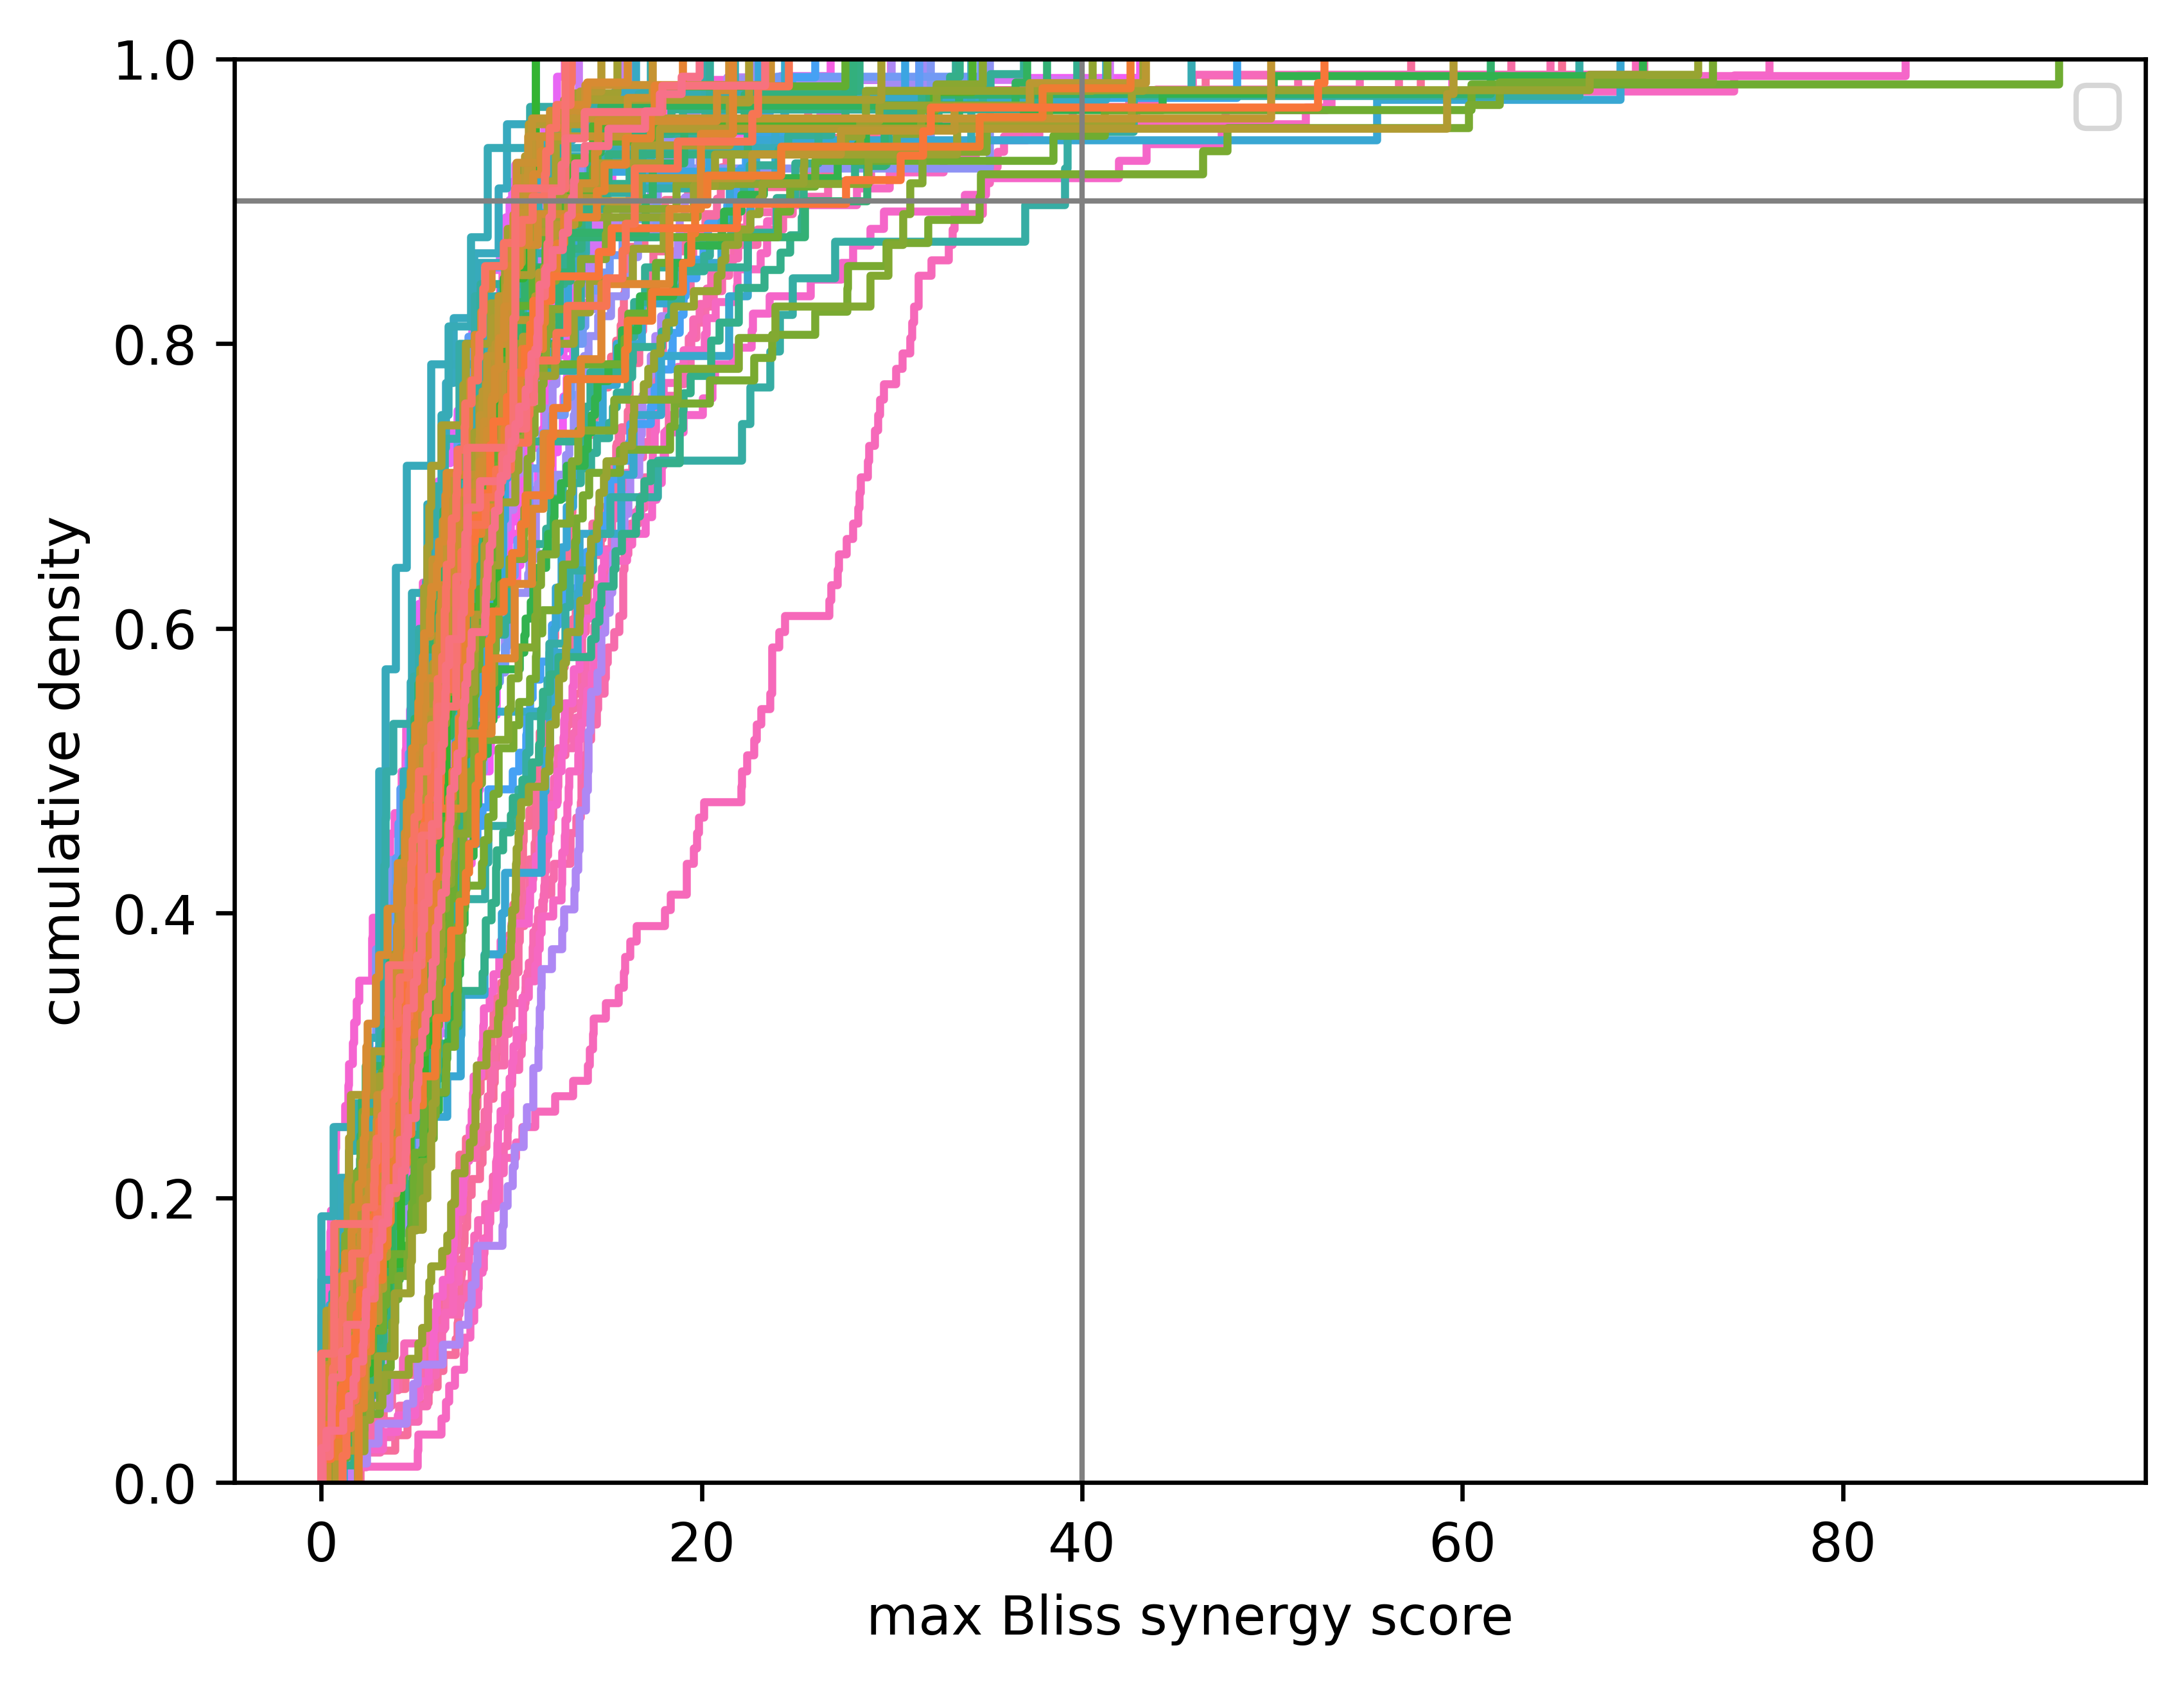

In [17]:
sns.ecdfplot(data=combo_data, x="synergy_bliss_max", hue="drug_row_recover_id",
            complementary=False) #, bw_adjust=.4)
plt.axhline(y=0.9, c="gray", linewidth=1)
plt.axvline(x=40, c="gray", linewidth=1)
plt.legend(labels=[])
# plt.axhline(y=0.1, c="k")
# plt.yscale("log")
plt.ylabel("cumulative density")
plt.xlabel("max Bliss synergy score")
plt.show()

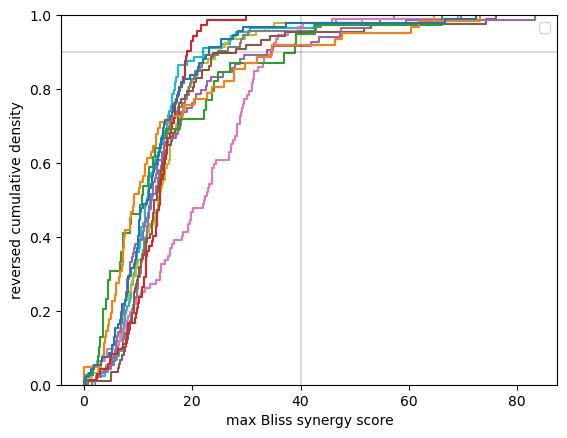

In [13]:
sns.ecdfplot(data=most_syn_combo_data, x="synergy_bliss_max", hue="drug_row_recover_id",
            complementary=False) #, bw_adjust=.4)
plt.legend(labels=[])
plt.axhline(y=0.9, c="k", linewidth=0.2)
plt.axvline(x=40, c="k", linewidth=0.2)
# plt.yscale("log")
plt.ylabel("reversed cumulative density")
plt.xlabel("max Bliss synergy score")
plt.show()